# PREPROCESSING AND ANALYZING DATA TO ANSWER QUESTIONS
---

Phần này ...

#### IMPORT

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Đọc dữ liệu đã tiền xử lý

In [36]:
df = pd.read_csv("../Data/Time-Wasters on Social Media_Cleaned.csv")
df.head()

,Income,Profession,Platform,Total Time Spent,Number of Sessions,Video Category,Importance Score,Time Spent On Video,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,Self Control,Addiction Level,CurrentActivity,Female,Male,Age Group
0,82812,Engineer,Instagram,80,17,Pranks,5,26,22,Night,3,7,Procrastination,5,5,Commuting,False,True,3
1,27999,Artist,Instagram,228,14,Pranks,6,25,31,Afternoon,5,5,Habit,7,3,At school,True,False,3
2,42436,Engineer,Facebook,30,6,Vlogs,3,9,7,Evening,6,4,Entertainment,8,2,At home,True,False,2
3,62963,Waiting staff,YouTube,101,19,Vlogs,2,6,41,Night,3,7,Habit,5,5,Commuting,False,True,4
4,22096,Manager,TikTok,136,6,Gaming,7,13,21,Morning,8,2,Boredom,10,0,At home,False,True,2


## Câu 1: Thời gian sử dụng nền tảng, thể loại video hay lý do xem video ảnh hưởng nhất mức độ nghiện của người dùng. 

#### Xử lý dữ liệu

- Chuyển các biến phân loại (Video Category, Watch Reason) thành dạng số (dummies) để mô hình có thể sử dụng.
- Chọn biến độc lập bao gồm tổng thời gian xem video và các biến liên quan đến thể loại và lý do xem video.
- Thêm intercept bằng cách têm cột constant vào mô hình để tính toán hệ số chặn.
- Mức độ nghiện (Addiction Level) là biến phụ thuộc trong mô hình.

In [37]:
# Tiền xử lý: Chuyển các biến phân loại (categorical) thành dạng số (dummies)
df_dummies = pd.get_dummies(df, columns=['Video Category', 'Watch Reason'], drop_first=True)

# Chọn các biến độc lập (features)
X = df_dummies[['Total Time Spent'] + [col for col in df_dummies.columns if col.startswith('Video Category') or col.startswith('Watch Reason')]]

# Thêm cột constant vào mô hình (intercept)
X = sm.add_constant(X)

# Biến phụ thuộc (target)
y = df['Addiction Level']


- Xây dựng mô hình hồi quy tuyến tính (OLS) để phân tích mối quan hệ giữa các yếu tố và mức độ nghiện.
- Trích xuất bảng kết quả, giúp xác định các yếu tố có ảnh hưởng đáng kể đến mức độ nghiện dựa trên p-value.

In [38]:
# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Trích xuất bảng kết quả của hồi quy
results = model.summary2().tables[1]

results

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,2.466164,0.276780,8.910205,2.410076e-18,1.923020,3.009309
Total Time Spent,0.000324,0.000777,0.416701,6.769881e-01,-0.001201,0.001848
Video Category_Comedy,0.041457,0.417628,0.099267,9.209465e-01,-0.778084,0.860997
Video Category_Entertainment,0.454616,0.308504,1.473614,1.409044e-01,-0.150783,1.060016
Video Category_Gaming,0.392098,0.298587,1.313178,1.894281e-01,-0.193840,0.978035
Video Category_Jokes/Memes,0.012002,0.278447,0.043103,9.656285e-01,-0.534415,0.558419
Video Category_Life Hacks,0.296269,0.282671,1.048106,2.948461e-01,-0.258436,0.850974
Video Category_Pranks,-0.030676,0.304150,-0.100858,9.196838e-01,-0.627532,0.566180
Video Category_Trends,0.589489,0.309758,1.903059,5.732353e-02,-0.018372,1.197350
Video Category_Vlogs,0.172738,0.301843,0.572277,5.672645e-01,-0.419590,0.765066


#### Trực quan

Trực quan hóa dữ liệu với ba loại biểu đồ

- Biểu đồ hộp (Boxplot) - Mức độ nghiện theo thể loại video: biểu đồ này sẽ hiển thị mức độ nghiện (Addiction Level) theo từng thể loại video. Biểu đồ hộp có thể giúp nhận diện sự phân bố và các giá trị ngoại lai trong mức độ nghiện cho từng thể loại video.

- Biểu đồ phân tán (Scatter Plot) - Thời gian sử dụng nền tảng vs Mức độ nghiện: Biểu đồ này giúp trực quan hóa mối quan hệ giữa tổng thời gian người dùng dành cho video (Total Time Spent) và mức độ nghiện (Addiction Level). Mỗi điểm trên biểu đồ đại diện cho một người dùng, cho thấy xem thời gian dành cho video có ảnh hưởng đến mức độ nghiện như thế nào. Sự phân tán của các điểm giúp nhận diện các xu hướng hoặc sự phân bố giữa hai biến này.
- Biểu đồ thanh (Bar Chart) - Số lượng người dùng theo lý do xem video: Biểu đồ này thể hiện số lượng người dùng cho từng lý do xem video (Watch Reason). Biểu đồ thanh giúp dễ dàng so sánh số lượng người dùng cho các lý do khác nhau và nhận diện xu hướng phổ biến.

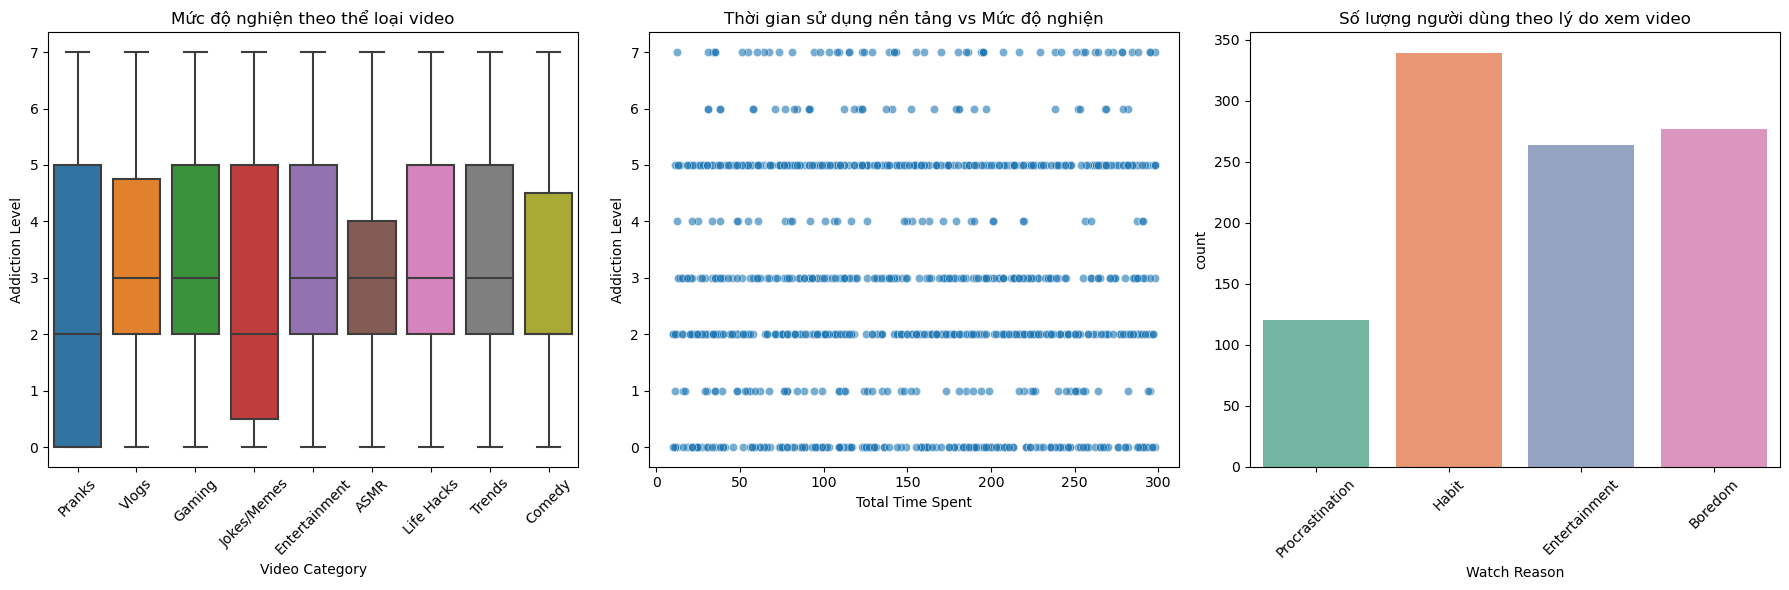

In [39]:
# 5. Trực quan hóa
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Biểu đồ hộp (Boxplot) - Addiction Level theo Video Category
sns.boxplot(x='Video Category', y='Addiction Level', data=df, ax=axes[0])
axes[0].set_title('Mức độ nghiện theo thể loại video')
axes[0].tick_params(axis='x', rotation=45)

# 2. Biểu đồ phân tán (Scatter Plot) - Total Time Spent vs Addiction Level
sns.scatterplot(x='Total Time Spent', y='Addiction Level', data=df, alpha=0.6, ax=axes[1])
axes[1].set_title('Thời gian sử dụng nền tảng vs Mức độ nghiện')

# 3. Biểu đồ thanh (Bar Chart) - Số lượng người dùng theo Watch Reason
sns.countplot(x='Watch Reason', data=df, palette='Set2', ax=axes[2])
axes[2].set_title('Số lượng người dùng theo lý do xem video')
axes[2].tick_params(axis='x', rotation=45)

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()



#### Kết luận:
- Tổng thời gian dành cho video (Total Time Spent): Không có mối quan hệ đáng kể với mức độ hài lòng (p-value = 0.6769), vì vậy tổng thời gian dành cho video không phải là yếu tố quan trọng ảnh hưởng đến mức độ nghiện, người xem video nhiều có thể chỉ là vì công việc hoặc nhiều lý do khác.

- Các thể loại video:

    + Các thể loại video như Comedy, Jokes/Memes, Life Hacks, Pranks, và Vlogs không cho thấy ảnh hưởng đáng kể đến sự hài lòng (p-value > 0.05 cho tất cả các thể loại này). Tuy nhiên, thể loại Entertainment có ảnh hưởng nhẹ đến sự hài lòng (coefficient = 0.4546), mặc dù mức độ ảnh hưởng không quá mạnh và vẫn không đạt mức độ ý nghĩa thống kê (p-value = 0.1409).
    + Các thể loại Gaming, Trends có ảnh hưởng nhưng cũng không mạnh mẽ, với các p-value lần lượt là 0.1894 và 0.0573. Tuy nhiên, thể loại Trends gần đạt mức ý nghĩa thống kê (p-value = 0.0573).
- Lý do xem video (Watch Reason):

    + Lý do xem video để giải trí (Entertainment) không có ảnh hưởng đáng kể đến mức độ nghiện (p-value = 0.5758).
    + Thói quen (Habit) và Sự trì hoãn (Procrastination) có ảnh hưởng nhẹ đến mức độ nghiện, với p-values lần lượt là 0.0638 và 0.1459. Trong đó, Thói quen có xu hướng làm tăng mức độ nghiện (coefficient = 0.3106), trong khi sự trì hoãn có ảnh hưởng nhưng không mạnh.

Các yếu tố như tổng thời gian dành cho video và các thể loại video không có ảnh hưởng mạnh mẽ đến mức độ nghiện. Tuy nhiên, lý do xem video liên quan đến thói quen và sự trì hoãn lại ảnh hưởng đến mức độ nghiện, đặc biệt là khi người dùng có thói quen xem video. Vậy qua phân tích, lý do xem video là ảnh hưởng nhất đến mức độ nghiện của người sử dụng mạng xã hội.

## Câu 2: Có sự khác biệt nào về sự kiểm soát bản thân và mức độ nghiện giữa các nhóm nghề nghiệp khác nhau (sinh viên và người đi làm) không?

#### Xử lý dữ liệu

Chia cột **Profession** thành 2 nhóm là *Student* (sinh viên) và **Employed** (người đi làm)

In [40]:
df_students = df[df['Profession'] == 'Students']
df_employed = df[df['Profession'] != 'Students']

Tính giá trị trung bình và độ biến động (độ lệch chuẩn) của hai cột **Self Control** và **Addition Level**

In [41]:
mean_students = df_students[['Self Control', 'Addiction Level']].mean()
std_students = df_students[['Self Control', 'Addiction Level']].std()

mean_employed = df_employed[['Self Control', 'Addiction Level']].mean()
std_employed = df_employed[['Self Control', 'Addiction Level']].std()

students = pd.DataFrame({
    'Mean (Student)': mean_students,
    'Std (Student)': std_students
})

employed = pd.DataFrame({
    'Mean (Employed)': mean_employed,
    'Std (Employed)': std_employed
})

final = pd.concat([students, employed], axis=1)
final

,Mean (Student),Std (Student),Mean (Employed),Std (Employed)
Self Control,6.987805,2.161786,7.128647,2.023934
Addiction Level,3.012195,2.161786,2.871353,2.023934


#### Trực quan

Trực quan hóa sự khác biệt giữa các nhóm nghề nghiệp

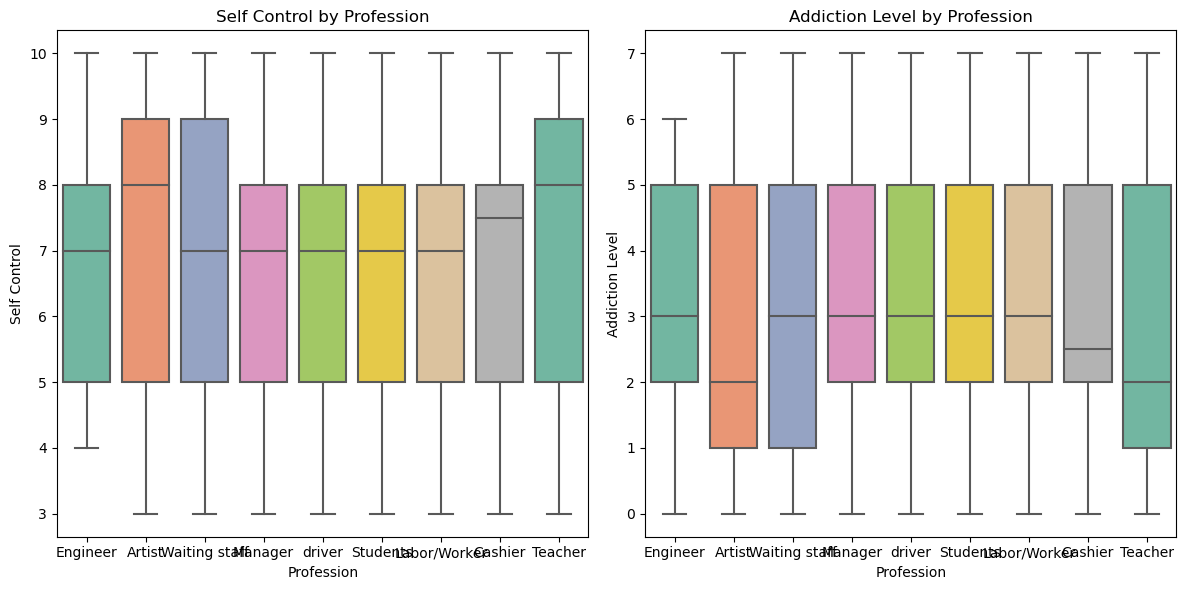

In [42]:
plt.figure(figsize=(12, 6))

# Boxplot cho Self Control và Addiction Level
plt.subplot(1, 2, 1)
sns.boxplot(x='Profession', y='Self Control', data=df, palette='Set2')
plt.title('Self Control by Profession')

plt.subplot(1, 2, 2)
sns.boxplot(x='Profession', y='Addiction Level', data=df, palette='Set2')
plt.title('Addiction Level by Profession')

plt.tight_layout()
plt.show()

#### Kết luận:
Mức độ Kiểm soát Bản thân (Self Control):

- Mức độ kiểm soát bản thân trung bình của nhóm Sinh viên là 6.99, trong khi nhóm Người đi làm có mức trung bình là 7.13. Dù sự khác biệt này là khá nhỏ, nó chỉ ra rằng người đi làm có khả năng kiểm soát bản thân nhỉnh hơn một chút so với sinh viên.
- Tuy nhiên, độ lệch chuẩn của cả hai nhóm đều khá cao (2.16 cho sinh viên và 2.02 cho người đi làm), cho thấy sự biến động lớn trong mức độ kiểm soát bản thân giữa các cá nhân trong mỗi nhóm. Điều này phản ánh sự đa dạng về khả năng kiểm soát hành vi, mà có thể bị ảnh hưởng bởi các yếu tố cá nhân, môi trường, và thói quen sống của từng cá nhân.

Mức độ Nghiện (Addiction Level):

- Mức độ nghiện trung bình của nhóm Sinh viên là 3.01, trong khi nhóm Người đi làm có mức độ nghiện trung bình là 2.87. Mặc dù mức độ nghiện của sinh viên có phần cao hơn, sự khác biệt này là không đáng kể.
- Độ lệch chuẩn của mức độ nghiện cũng tương đối lớn (2.16 cho sinh viên và 2.02 cho người đi làm), cho thấy mức độ nghiện có sự phân tán rộng trong cả hai nhóm. Điều này chỉ ra rằng trong mỗi nhóm, có những cá nhân có mức độ nghiện rất cao hoặc rất thấp, và sự phân hóa này cần được nghiên cứu thêm để hiểu rõ hơn về các yếu tố ảnh hưởng đến mức độ nghiện của từng người.

Kết quả phân tích cho thấy rằng mặc dù có sự khác biệt nhỏ về mức độ kiểm soát bản thân và mức độ nghiện giữa sinh viên và người đi làm, những sự khác biệt này không quá rõ rệt và không mang tính chất quyết định. Độ lệch chuẩn cao ở cả hai nhóm cho thấy sự biến động lớn trong hành vi của từng cá nhân, điều này có thể phản ánh ảnh hưởng của các yếu tố bên ngoài như môi trường sống, công việc, và các yếu tố cá nhân khác.
